# ITS307 Data Analytics : Spring Semester 2022
# Assignment 2
# Supervised Learning - Linear Regression


# Table of Contents 
<ol start="0">
<li> Learning Objectives </li>
<li> Importing Libraries </li>
<li> Loading and Cleaning with Pandas</li>
<li> EDA  </li>
<li> Feature Engineering  </li>
<li> Training Model</li>
<li> Predicting</li>
<li> Evaluating Model</li>

</ol>

# Learning Objectives

Second-hand car have huge market base. Many consider to buy a Used Car intsead of buying of new one, as it's is feasible and a better investment.

The dataset shared contains some of the features that determines the second hand car's price in India. Some of the features of are:
- Name: The brand and model of the car
- Location: The location in which the car is being sold or is available for purchase.
- Year: Year or edition of the model
- Kilometers_Driven: The total kilometres driven in the car by the previous owner(s) in KM
- Fuel_Type: The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)
- Transmission: The type of transmission used by the car. (Automatic / Manual)
- Owner_Type: Whether the owner is first owner or second owner and so on.
- Mileage: The standard mileage offered by the car company in kmpl or km/kg
- Engine: The displacement volume of the engine in CC.
- Power:
- Seat: Number of the seat of car
- New_Price: Price of the car when its new/first hand
- Price (Target) : Price of the used car


# 1. Loading Libraries

In [1]:
#importing libraries
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns, numpy as np
from scipy.stats import norm
from sklearn.preprocessing import MinMaxScaler,StandardScaler, RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 2. Loading and Cleaning with Pandas

In [2]:
#reading traning dataset
train = pd.read_csv('/Users/sangaykhandu/Desktop/Semester 6/ITS307/Assignments/Assignment 2/Car_price_dataset/train-data.csv')

In [3]:
train.columns

Index(['Unnamed: 0', 'Name', 'Location', 'Year', 'Kilometers_Driven',
       'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power',
       'Seats', 'New_Price', 'Price'],
      dtype='object')

In [4]:
train.head()

Unnamed: 0                              Name    Location  Year  \
0           0            Maruti Wagon R LXI CNG      Mumbai  2010   
1           1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015   
2           2                      Honda Jazz V     Chennai  2011   
3           3                 Maruti Ertiga VDI     Chennai  2012   
4           4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013   

   Kilometers_Driven Fuel_Type Transmission Owner_Type     Mileage   Engine  \
0              72000       CNG       Manual      First  26.6 km/kg   998 CC   
1              41000    Diesel       Manual      First  19.67 kmpl  1582 CC   
2              46000    Petrol       Manual      First   18.2 kmpl  1199 CC   
3              87000    Diesel       Manual      First  20.77 kmpl  1248 CC   
4              40670    Diesel    Automatic     Second   15.2 kmpl  1968 CC   

       Power  Seats  New_Price  Price  
0  58.16 bhp    5.0        NaN   1.75  
1  126.2 bhp    5.0        NaN  12.50  
2   88.7 bhp    5.0  8.61 Lakh   4.50  
3  88.76 bhp    7.0        NaN   6.00  
4  140.8 bhp    5.0        NaN  17.74

In [5]:
train.shape

(6019, 14)

In [6]:
#dropping index column of previous dataset
train.drop(['Unnamed: 0'],axis=1,inplace=True)

In [7]:
train.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price'],
      dtype='object')

In [8]:
train.isna().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [9]:
#dropping nan and New_price as it have grater number of nan cell
train.dropna(subset=['Seats','Mileage'],inplace=True)
train.drop(['New_Price'],axis=1,inplace=True)

In [10]:
train.isna().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [11]:
train.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
Price                float64
dtype: object

In [12]:
train.head()

Name    Location  Year  Kilometers_Driven  \
0            Maruti Wagon R LXI CNG      Mumbai  2010              72000   
1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015              41000   
2                      Honda Jazz V     Chennai  2011              46000   
3                 Maruti Ertiga VDI     Chennai  2012              87000   
4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013              40670   

  Fuel_Type Transmission Owner_Type     Mileage   Engine      Power  Seats  \
0       CNG       Manual      First  26.6 km/kg   998 CC  58.16 bhp    5.0   
1    Diesel       Manual      First  19.67 kmpl  1582 CC  126.2 bhp    5.0   
2    Petrol       Manual      First   18.2 kmpl  1199 CC   88.7 bhp    5.0   
3    Diesel       Manual      First  20.77 kmpl  1248 CC  88.76 bhp    7.0   
4    Diesel    Automatic     Second   15.2 kmpl  1968 CC  140.8 bhp    5.0   

   Price  
0   1.75  
1  12.50  
2   4.50  
3   6.00  
4  17.74

In [13]:
#changing the data type and stripping the unwanted characters
train['Mileage'] = train.Mileage.str.strip('km/kg?kmpl').astype('float')
train['Engine'] = train.Engine.str.strip('CC').astype('int')
train['Power'] = train.Power.str.rstrip('bhp')
train = train[train['Power'].str.strip()!='null']
train['Power'] = train.Power.astype('float')

In [14]:
train.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine                 int64
Power                float64
Seats                float64
Price                float64
dtype: object

In [15]:
train.head()

Name    Location  Year  Kilometers_Driven  \
0            Maruti Wagon R LXI CNG      Mumbai  2010              72000   
1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015              41000   
2                      Honda Jazz V     Chennai  2011              46000   
3                 Maruti Ertiga VDI     Chennai  2012              87000   
4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013              40670   

  Fuel_Type Transmission Owner_Type  Mileage  Engine   Power  Seats  Price  
0       CNG       Manual      First    26.60     998   58.16    5.0   1.75  
1    Diesel       Manual      First    19.67    1582  126.20    5.0  12.50  
2    Petrol       Manual      First    18.20    1199   88.70    5.0   4.50  
3    Diesel       Manual      First    20.77    1248   88.76    7.0   6.00  
4    Diesel    Automatic     Second    15.20    1968  140.80    5.0  17.74

In [16]:
#loading test dataset
test = pd.read_csv('/Users/sangaykhandu/Desktop/Semester 6/ITS307/Assignments/Assignment 2/Car_price_dataset/test-data.csv')

In [17]:
test.head()

Unnamed: 0                                       Name    Location  Year  \
0           0                    Maruti Alto K10 LXI CNG       Delhi  2014   
1           1              Maruti Alto 800 2016-2019 LXI  Coimbatore  2013   
2           2  Toyota Innova Crysta Touring Sport 2.4 MT      Mumbai  2017   
3           3                       Toyota Etios Liva GD   Hyderabad  2012   
4           4                          Hyundai i20 Magna      Mumbai  2014   

   Kilometers_Driven Fuel_Type Transmission Owner_Type      Mileage   Engine  \
0              40929       CNG       Manual      First  32.26 km/kg   998 CC   
1              54493    Petrol       Manual     Second    24.7 kmpl   796 CC   
2              34000    Diesel       Manual      First   13.68 kmpl  2393 CC   
3             139000    Diesel       Manual      First   23.59 kmpl  1364 CC   
4              29000    Petrol       Manual      First    18.5 kmpl  1197 CC   

       Power  Seats   New_Price  
0   58.2 bhp    4.0         NaN  
1   47.3 bhp    5.0         NaN  
2  147.8 bhp    7.0  25.27 Lakh  
3   null bhp    5.0         NaN  
4  82.85 bhp    5.0         NaN

In [18]:
test.columns

Index(['Unnamed: 0', 'Name', 'Location', 'Year', 'Kilometers_Driven',
       'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power',
       'Seats', 'New_Price'],
      dtype='object')

In [19]:
#dropping previous index column
test.drop(['Unnamed: 0'],axis=1,inplace=True)

In [20]:
test.isna().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                 10
Power                  10
Seats                  11
New_Price            1052
dtype: int64

In [21]:
#removing the nan cells and New_price
test.dropna(subset=['Seats'],inplace=True)
test.drop(['New_Price'],axis=1,inplace=True)
test.isna().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
dtype: int64

In [22]:
test.head()

Name    Location  Year  \
0                    Maruti Alto K10 LXI CNG       Delhi  2014   
1              Maruti Alto 800 2016-2019 LXI  Coimbatore  2013   
2  Toyota Innova Crysta Touring Sport 2.4 MT      Mumbai  2017   
3                       Toyota Etios Liva GD   Hyderabad  2012   
4                          Hyundai i20 Magna      Mumbai  2014   

   Kilometers_Driven Fuel_Type Transmission Owner_Type      Mileage   Engine  \
0              40929       CNG       Manual      First  32.26 km/kg   998 CC   
1              54493    Petrol       Manual     Second    24.7 kmpl   796 CC   
2              34000    Diesel       Manual      First   13.68 kmpl  2393 CC   
3             139000    Diesel       Manual      First   23.59 kmpl  1364 CC   
4              29000    Petrol       Manual      First    18.5 kmpl  1197 CC   

       Power  Seats  
0   58.2 bhp    4.0  
1   47.3 bhp    5.0  
2  147.8 bhp    7.0  
3   null bhp    5.0  
4  82.85 bhp    5.0

In [23]:
#changing the data type and stripping the unwanted characters
test['Mileage'] = test.Mileage.str.strip('km/kg?kmpl').astype('float')
test['Engine'] = test.Engine.str.strip('CC').astype('int')
test['Power'] = test.Power.str.rstrip('bhp')
test = test[test['Power'].str.strip()!='null']
test['Power'] = test.Power.astype('float')

In [24]:
test.head()

Name    Location  Year  \
0                    Maruti Alto K10 LXI CNG       Delhi  2014   
1              Maruti Alto 800 2016-2019 LXI  Coimbatore  2013   
2  Toyota Innova Crysta Touring Sport 2.4 MT      Mumbai  2017   
4                          Hyundai i20 Magna      Mumbai  2014   
5                     Mahindra XUV500 W8 2WD  Coimbatore  2016   

   Kilometers_Driven Fuel_Type Transmission Owner_Type  Mileage  Engine  \
0              40929       CNG       Manual      First    32.26     998   
1              54493    Petrol       Manual     Second    24.70     796   
2              34000    Diesel       Manual      First    13.68    2393   
4              29000    Petrol       Manual      First    18.50    1197   
5              85609    Diesel       Manual     Second    16.00    2179   

    Power  Seats  
0   58.20    4.0  
1   47.30    5.0  
2  147.80    7.0  
4   82.85    5.0  
5  140.00    7.0

# 3.  EDA and Visualization

In [25]:
#base on the domain knowledge selecting features
train_df = train[['Kilometers_Driven','Mileage','Engine','Power','Price']]
train_df.head()

Kilometers_Driven  Mileage  Engine   Power  Price
0              72000    26.60     998   58.16   1.75
1              41000    19.67    1582  126.20  12.50
2              46000    18.20    1199   88.70   4.50
3              87000    20.77    1248   88.76   6.00
4              40670    15.20    1968  140.80  17.74

In [26]:
#filtering features base on the correlation
corr = train_df.corr() 
corr

Kilometers_Driven   Mileage    Engine     Power     Price
Kilometers_Driven           1.000000 -0.060608  0.093030  0.033490 -0.008249
Mileage                    -0.060608  1.000000 -0.637258 -0.538844 -0.341652
Engine                      0.093030 -0.637258  1.000000  0.866301  0.658047
Power                       0.033490 -0.538844  0.866301  1.000000  0.772843
Price                      -0.008249 -0.341652  0.658047  0.772843  1.000000

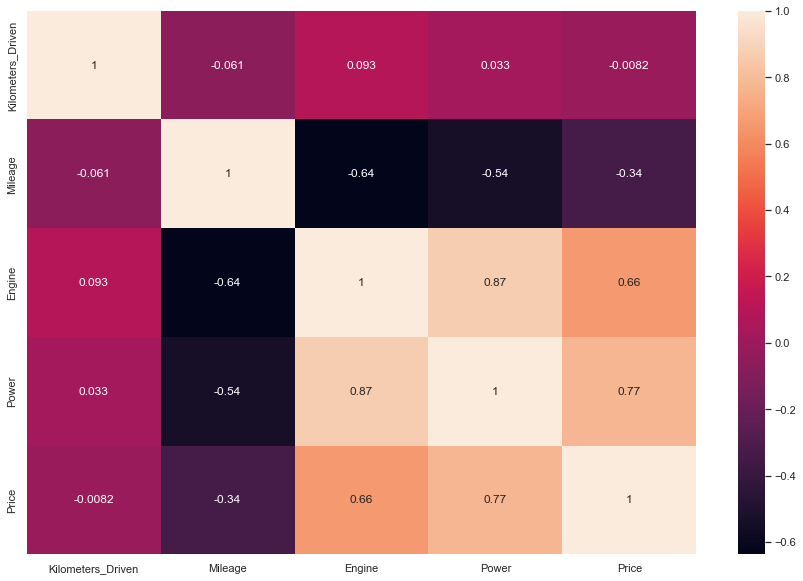

In [27]:
#graphical representation of correlation
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(data= corr,annot=True)
plt.show()

In [28]:
#filtered features
train_df = train[['Kilometers_Driven','Mileage','Engine','Price']]
train_df.head()

Kilometers_Driven  Mileage  Engine  Price
0              72000    26.60     998   1.75
1              41000    19.67    1582  12.50
2              46000    18.20    1199   4.50
3              87000    20.77    1248   6.00
4              40670    15.20    1968  17.74

## Outlier Detection using IQR

<AxesSubplot:xlabel='Kilometers_Driven'>

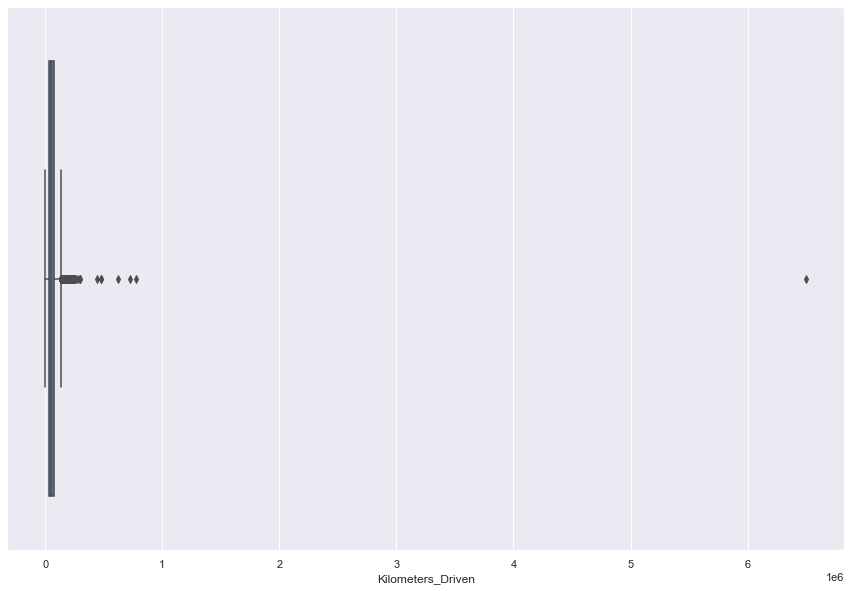

In [29]:
sns.boxplot(x=train_df['Kilometers_Driven'])

<AxesSubplot:xlabel='Mileage'>

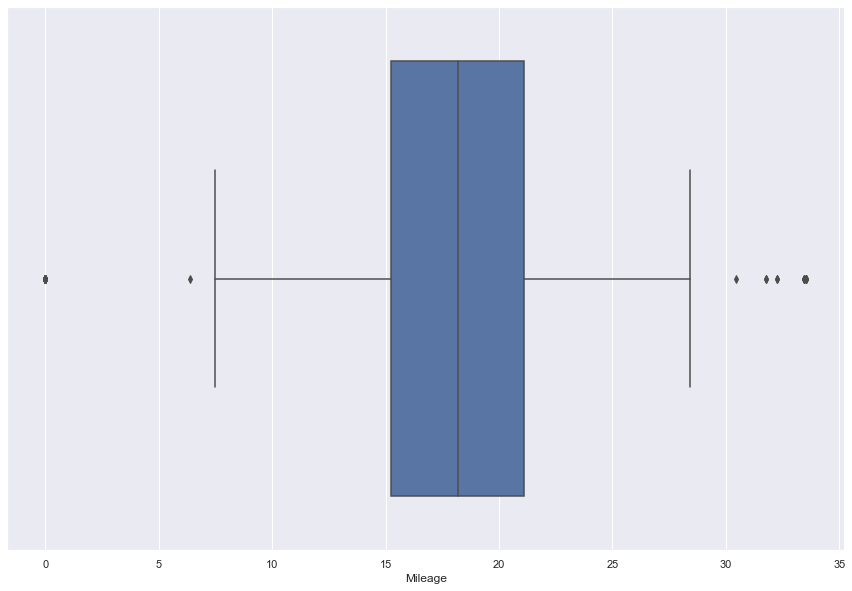

In [30]:
sns.boxplot(x=train_df['Mileage'])

<AxesSubplot:xlabel='Engine'>

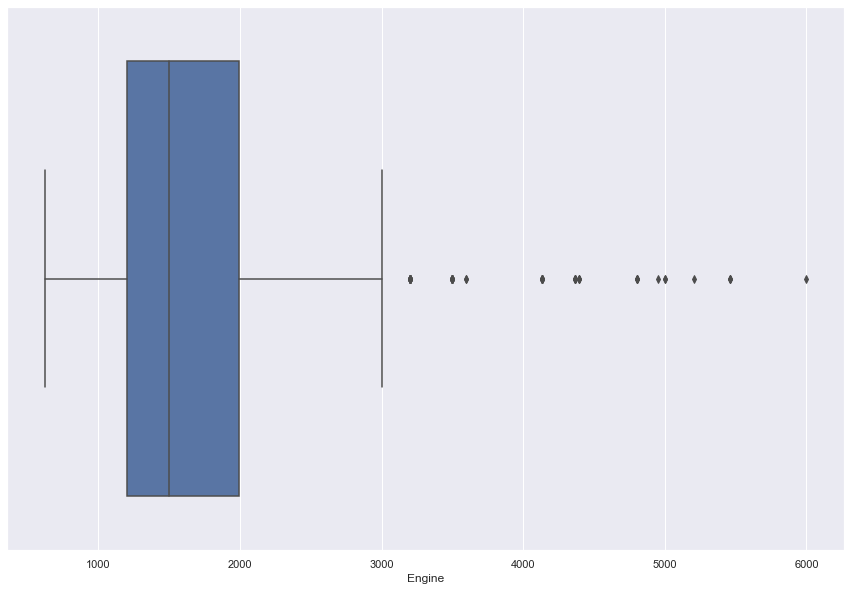

In [31]:
sns.boxplot(x=train_df['Engine'])

<AxesSubplot:xlabel='Price'>

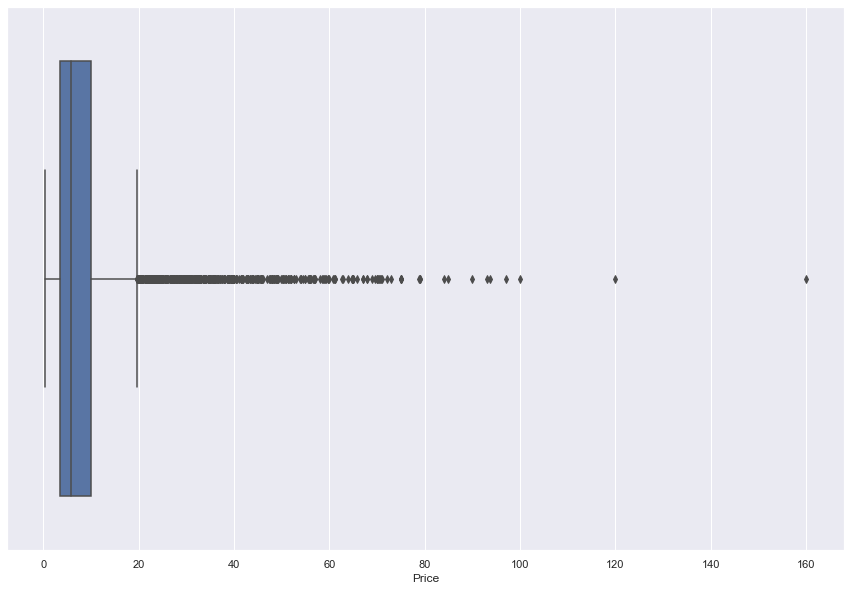

In [32]:
sns.boxplot(x=train_df['Price'])

## Outlier Detection using standard Deviation

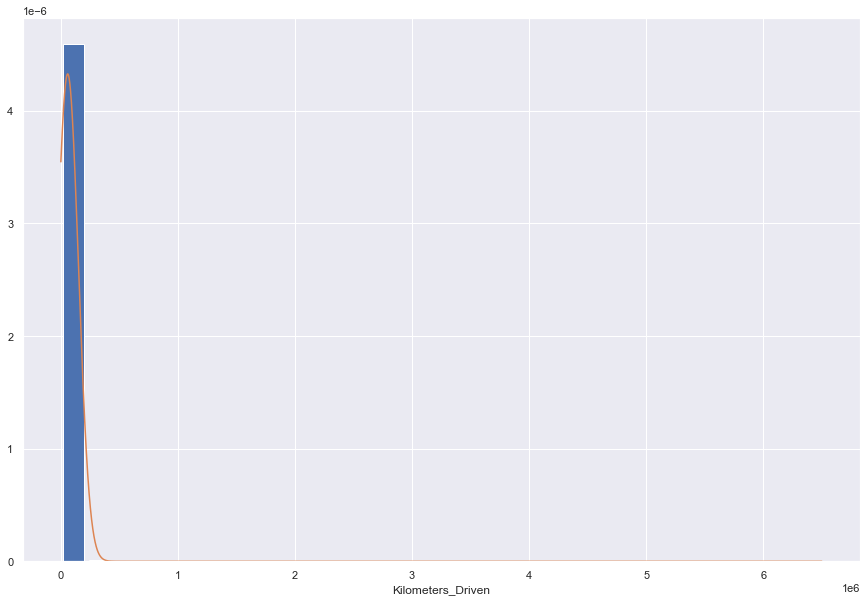

In [33]:
plt.hist(train_df.Kilometers_Driven, bins=30, rwidth=0.8, density=True)
plt.xlabel('Kilometers_Driven')
rang = np.arange(train_df.Kilometers_Driven.min(),train_df.Kilometers_Driven.max(),0.1)
plt.plot(rang, norm.pdf(rang, train_df.Kilometers_Driven.mean(), train_df.Kilometers_Driven.std()))
plt.show()

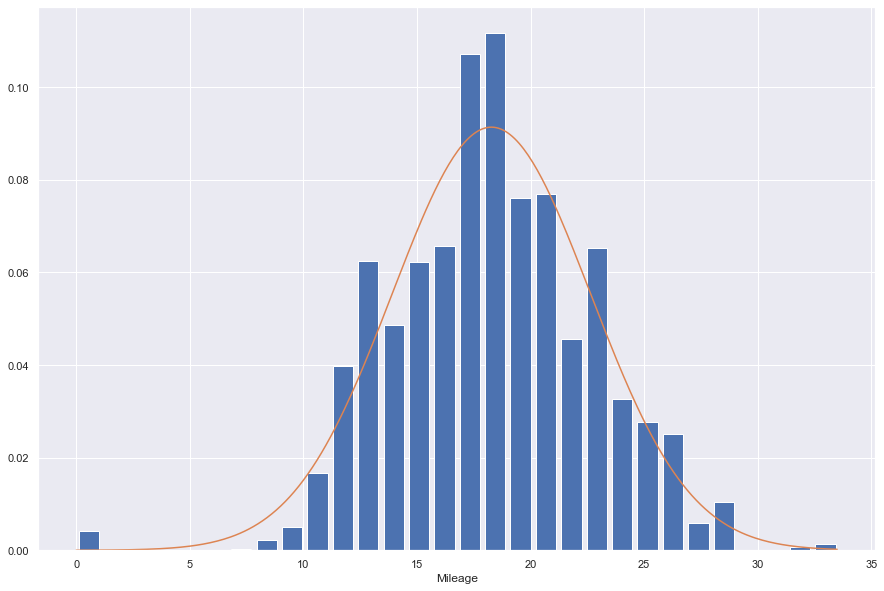

In [34]:
plt.hist(train_df.Mileage, bins=30, rwidth=0.8, density=True)
plt.xlabel('Mileage')
rang = np.arange(train_df.Mileage.min(),train_df.Mileage.max(),0.1)
plt.plot(rang, norm.pdf(rang, train_df.Mileage.mean(), train_df.Mileage.std()))
plt.show()

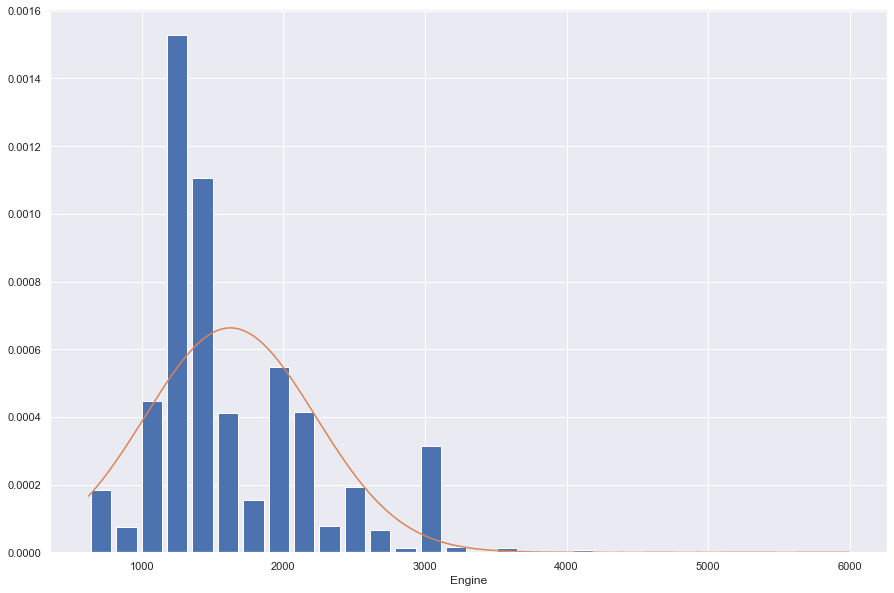

In [35]:
plt.hist(train_df.Engine, bins=30, rwidth=0.8, density=True)
plt.xlabel('Engine')
rang = np.arange(train_df.Engine.min(),train_df.Engine.max(),0.1)
plt.plot(rang, norm.pdf(rang, train_df.Engine.mean(), train_df.Engine.std()))
plt.show()

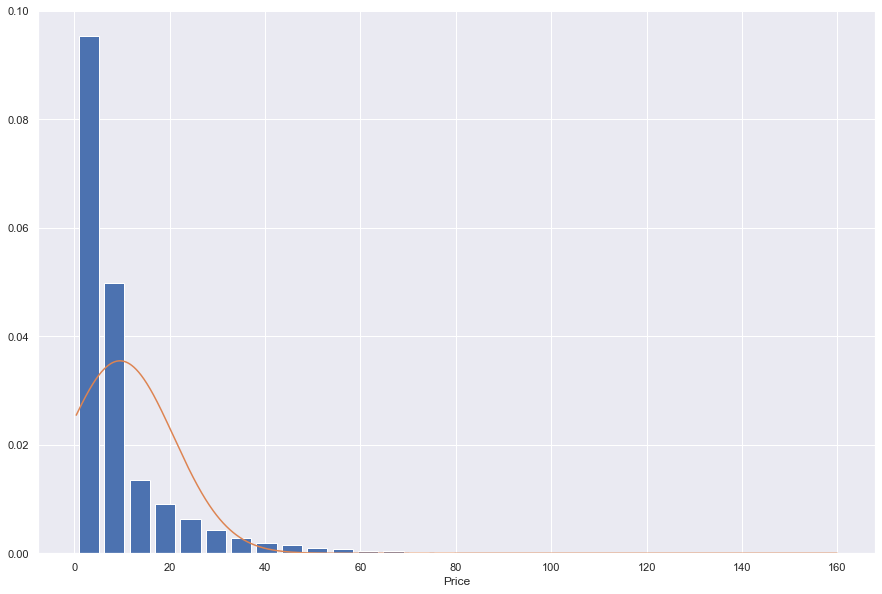

In [36]:
plt.hist(train_df.Price, bins=30, rwidth=0.8, density=True)
plt.xlabel('Price')
rang = np.arange(train_df.Price.min(),train_df.Price.max(),0.1)
plt.plot(rang, norm.pdf(rang, train_df.Price.mean(), train_df.Price.std()))
plt.show()

## Nature of distribution of data

In [37]:
plt.hist(train_df.Kilometers_Driven,bins=60)
plt.xlabel('Kilometers Driven')
plt.show()

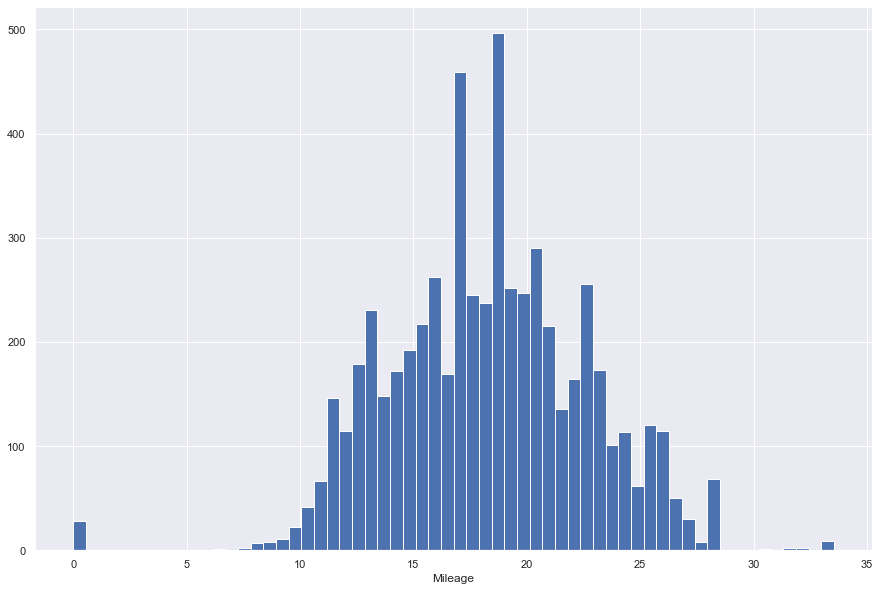

In [38]:
plt.hist(train_df.Mileage,bins=60)
plt.xlabel('Mileage')
plt.show()

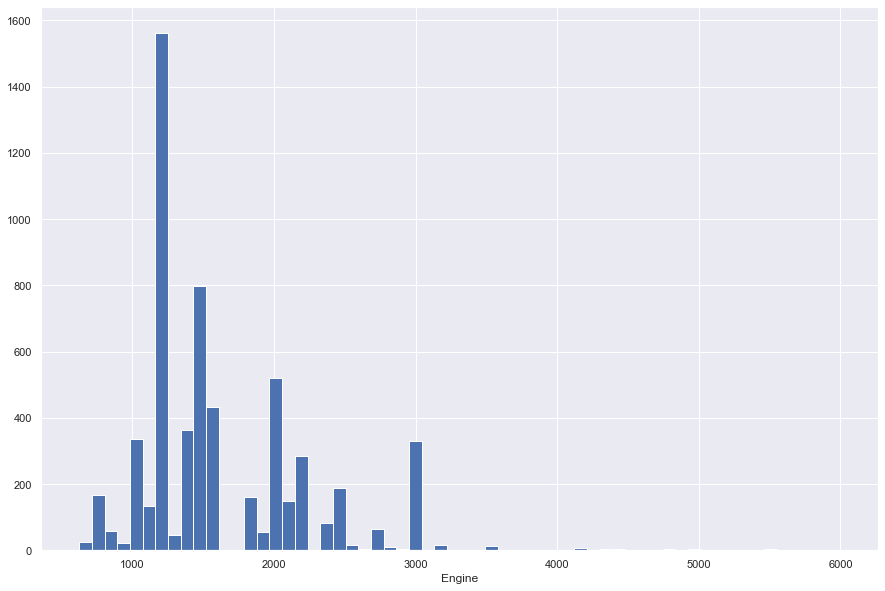

In [39]:
plt.hist(train_df.Engine,bins=60)
plt.xlabel('Engine')
plt.show()

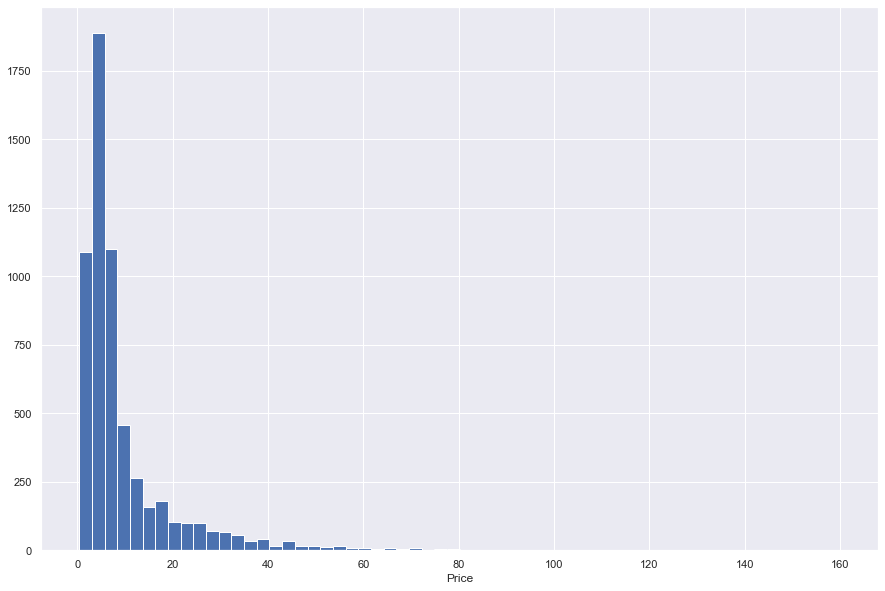

In [40]:
plt.hist(train_df.Price,bins=60)
plt.xlabel('Price')
plt.show()

# 4. Feature Engineering 

## Training datasets

### Removing outlier using IQR

In [41]:
#Q1 = train_df.Kilometers_Driven.quantile(.25)
#Q3 = train_df.Kilometers_Driven.quantile(.75)
#IQR = Q3-Q1
#upperlimit = Q3 + (IQR * 1.5)
#lowerlimit = Q1 + (IQR * 1.5)

In [42]:
#train_df = train_df[(train_df.Kilometers_Driven>lowerlimit) & (train_df.Kilometers_Driven<upperlimit)]

In [43]:
#sns.boxplot(x=train_df['Kilometers_Driven'])

In [44]:
#Q1 = train_df.Mileage.quantile(.25)
#Q3 = train_df.Mileage.quantile(.75)
#IQR = Q3-Q1
#upperlimit = Q3 + (IQR * 1.5)
#lowerlimit = Q1 + (IQR * 1.5)

In [45]:
#train_df = train_df[(train_df.Mileage>lowerlimit) & (train_df.Mileage<upperlimit)]

In [46]:
#sns.boxplot(x=train_df['Mileage'])

In [47]:
#Q1 = train_df.Engine.quantile(.25)
#Q3 = train_df.Engine.quantile(.75)
#IQR = Q3-Q1
#upperlimit = Q3 + (IQR * 1.5)
#lowerlimit = Q1 + (IQR * 1.5)

In [48]:
#train_df = train_df[(train_df.Engine>lowerlimit) & (train_df.Engine<upperlimit)]

In [49]:
#sns.boxplot(x=train_df['Engine'])

In [50]:
#Q1 = train_df.Price.quantile(.25)
#Q3 = train_df.Price.quantile(.75)
#IQR = Q3-Q1
#upperlimit = Q3 + (IQR * 1.5)
#lowerlimit = Q1 + (IQR * 1.5)

In [51]:
#train_df = train_df[(train_df.Price>lowerlimit) & (train_df.Price<upperlimit)]

In [52]:
#sns.boxplot(x=train_df['Price'])

### Removing outlier using standard deviation

In [53]:
std = train_df.Kilometers_Driven.std()
mean = train_df.Kilometers_Driven.mean()
upperlimit = mean+(3*std)
lowerlimit = mean-(3*std)
train_df = train_df[(train_df.Kilometers_Driven>lowerlimit) & (train_df.Kilometers_Driven<upperlimit)]

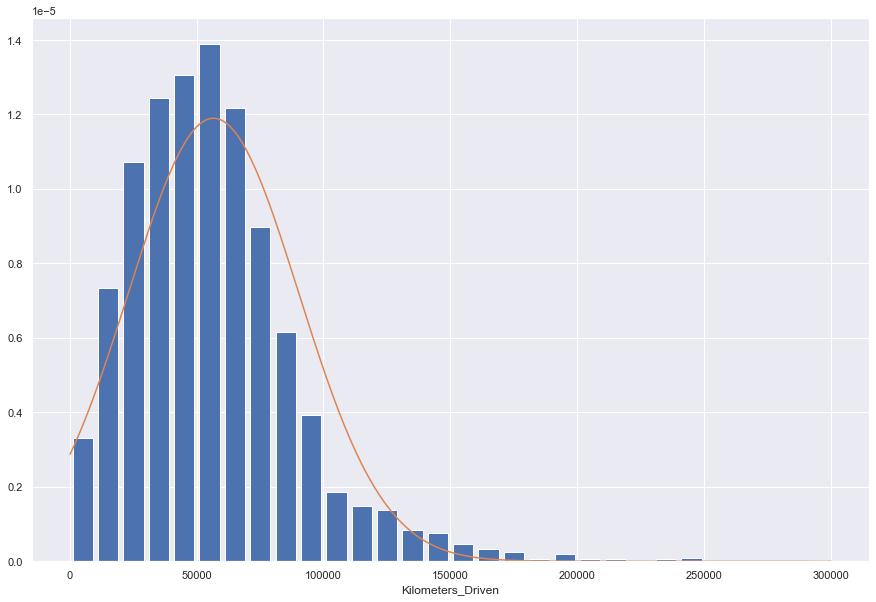

In [54]:
plt.hist(train_df.Kilometers_Driven, bins=30, rwidth=0.8, density=True)
plt.xlabel('Kilometers_Driven')
rang = np.arange(train_df.Kilometers_Driven.min(),train_df.Kilometers_Driven.max(),0.1)
plt.plot(rang, norm.pdf(rang, train_df.Kilometers_Driven.mean(), train_df.Kilometers_Driven.std()))
plt.show()

In [55]:
std = train_df.Mileage.std()
mean = train_df.Mileage.mean()
upperlimit = mean+(3*std)
lowerlimit = mean-(3*std)
train_df = train_df[(train_df.Mileage>lowerlimit) & (train_df.Mileage<upperlimit)]

In [56]:
plt.hist(train_df.Mileage, bins=30, rwidth=0.8, density=True)
plt.xlabel('Mileage')
rang = np.arange(train_df.Mileage.min(),train_df.Mileage.max(),0.1)
plt.plot(rang, norm.pdf(rang, train_df.Mileage.mean(), train_df.Mileage.std()))
plt.show()

In [57]:
std = train_df.Engine.std()
mean = train_df.Engine.mean()
upperlimit = mean+(3*std)
lowerlimit = mean-(3*std)
train_df = train_df[(train_df.Engine>lowerlimit) & (train_df.Engine<upperlimit)]

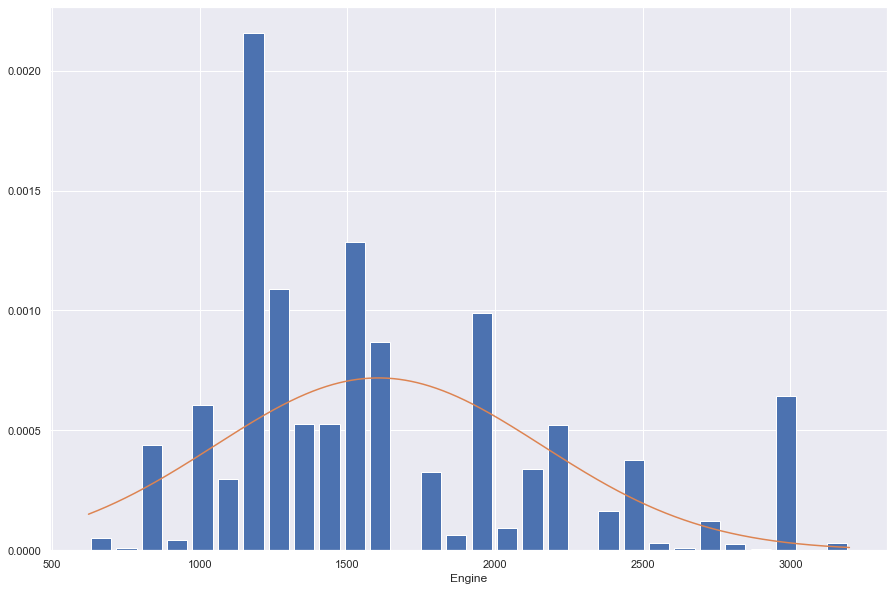

In [58]:
plt.hist(train_df.Engine, bins=30, rwidth=0.8, density=True)
plt.xlabel('Engine')
rang = np.arange(train_df.Engine.min(),train_df.Engine.max(),0.1)
plt.plot(rang, norm.pdf(rang, train_df.Engine.mean(), train_df.Engine.std()))
plt.show()

In [59]:
std = train_df.Price.std()
mean = train_df.Price.mean()
upperlimit = mean+(3*std)
lowerlimit = mean-(3*std)
train_df = train_df[(train_df.Price>lowerlimit) & (train_df.Price<upperlimit)]

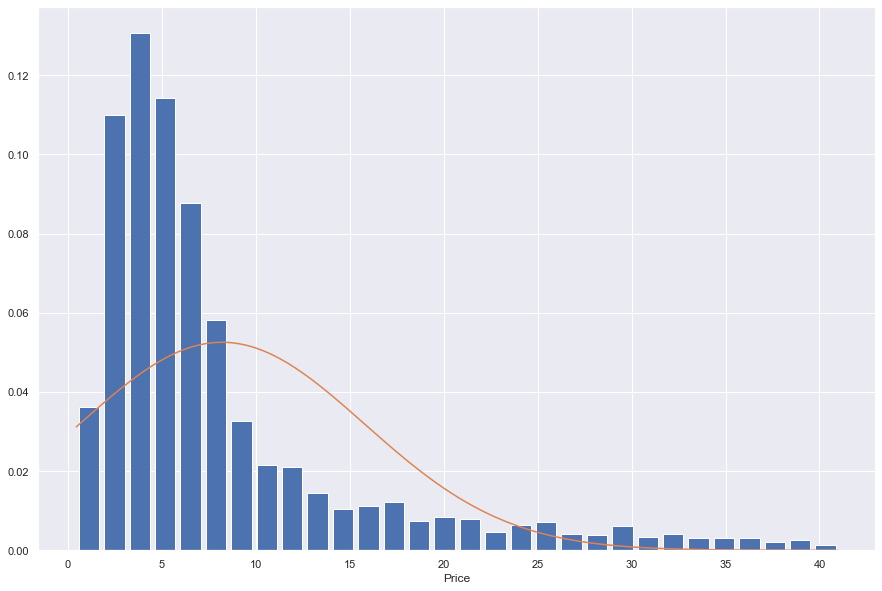

In [60]:
plt.hist(train_df.Price, bins=30, rwidth=0.8, density=True)
plt.xlabel('Price')
rang = np.arange(train_df.Price.min(),train_df.Price.max(),0.1)
plt.plot(rang, norm.pdf(rang, train_df.Price.mean(), train_df.Price.std()))
plt.show()

### Feature transformation

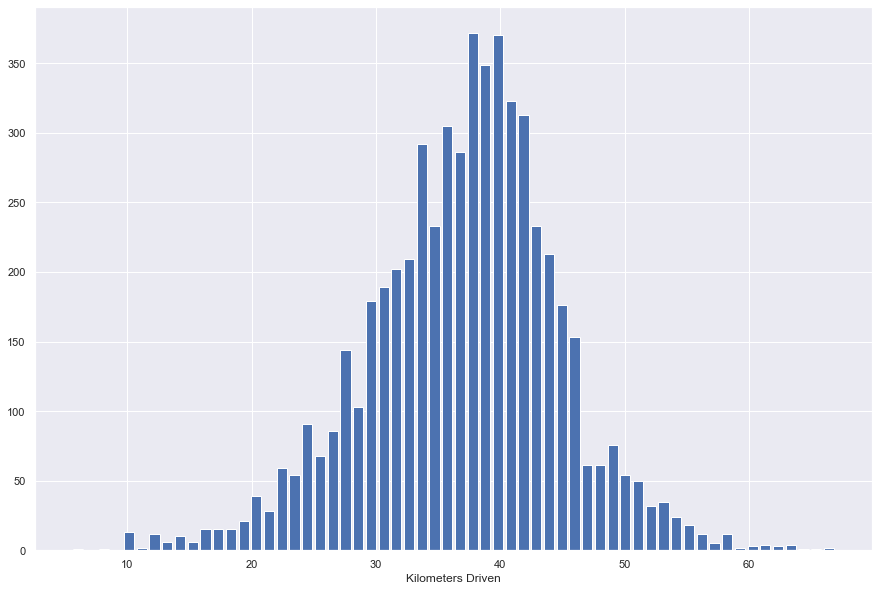

In [61]:
x = np.cbrt(train_df.Kilometers_Driven)
plt.hist(x,bins=60,rwidth=.8)
plt.xlabel('Kilometers Driven')
plt.show()

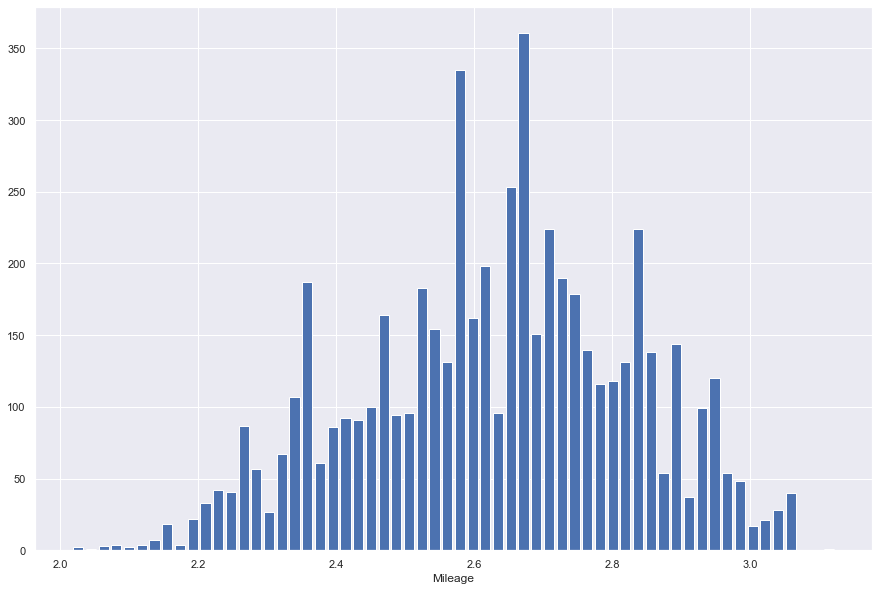

In [62]:
x = np.cbrt(train_df.Mileage)
plt.hist(x,bins=60,rwidth=.8)
plt.xlabel('Mileage')
plt.show()

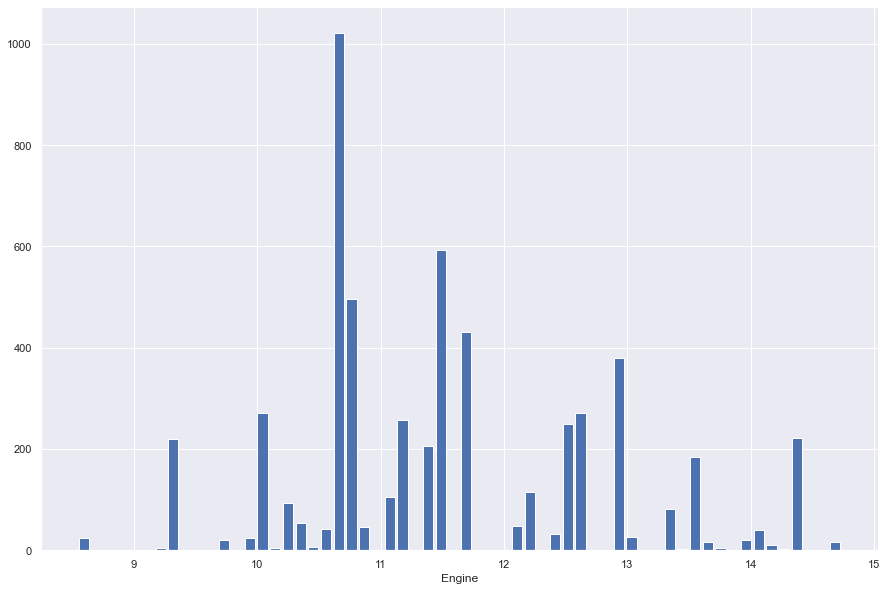

In [63]:
x = np.cbrt(train_df.Engine)
plt.hist(x,bins=60,rwidth=.8)
plt.xlabel('Engine')
plt.show()

In [64]:
x = np.cbrt(train_df.Price)
plt.hist(x,bins=60,rwidth=.8)
plt.xlabel('Price')
plt.show()

### Feature Scaling and Standardization

### Using MinMaxScaler

In [65]:
scaler = MinMaxScaler(feature_range=(0, 1))
numeric = scaler.fit_transform(train_df)
train_df1 = pd.DataFrame(data=numeric, columns=['Kilometers_Driven','Mileage','Engine','Price'])
train_df1.head()

Kilometers_Driven   Mileage    Engine     Price
0           0.239567  0.826595  0.145186  0.032298
1           0.136174  0.515274  0.371894  0.297337
2           0.152850  0.449236  0.223214  0.100099
3           0.289595  0.564690  0.242236  0.137081
4           0.135074  0.314465  0.521739  0.426529

### Using StandardScaler

In [66]:
scaler = StandardScaler()
numeric = scaler.fit_transform(train_df)
train_df2 = pd.DataFrame(data=numeric, columns=['Kilometers_Driven','Mileage','Engine','Price'])
train_df2.head()

Kilometers_Driven   Mileage    Engine     Price
0           0.436653  1.991182 -1.096283 -0.849498
1          -0.484662  0.291538  0.006672  0.566327
2          -0.336063 -0.068992 -0.716670 -0.487311
3           0.882450  0.561323 -0.624128 -0.289754
4          -0.494469 -0.804769  0.735680  1.256459

### Using RobustScaler

In [67]:
scaler = RobustScaler()
numeric = scaler.fit_transform(train_df)
train_df3 = pd.DataFrame(data=numeric, columns=['Kilometers_Driven','Mileage','Engine','Price'])
train_df3.head()

Kilometers_Driven   Mileage    Engine     Price
0           0.478080  1.464738 -0.600519 -0.652174
1          -0.317266  0.211573  0.156939  1.217391
2          -0.188984 -0.054250 -0.339818 -0.173913
3           0.862925  0.410488 -0.276265  0.086957
4          -0.325733 -0.596745  0.657588  2.128696

## Testing dataset

In [68]:
test_df = test[['Kilometers_Driven','Mileage','Engine']]

### Removing outlier using standard deviation

In [69]:
std = test_df.Kilometers_Driven.std()
mean = test_df.Kilometers_Driven.mean()
upperlimit = mean+(3*std)
lowerlimit = mean-(3*std)
test_df = test_df[(test_df.Kilometers_Driven>lowerlimit) & (test_df.Kilometers_Driven<upperlimit)]

plt.hist(test_df.Kilometers_Driven, bins=30, rwidth=0.8, density=True)
plt.xlabel('Kilometers_Driven')
rang = np.arange(test_df.Kilometers_Driven.min(),test_df.Kilometers_Driven.max(),0.1)
plt.plot(rang, norm.pdf(rang, test_df.Kilometers_Driven.mean(), test_df.Kilometers_Driven.std()))
plt.show()

In [70]:
std = test_df.Mileage.std()
mean = test_df.Mileage.mean()
upperlimit = mean+(3*std)
lowerlimit = mean-(3*std)
test_df = test_df[(test_df.Mileage>lowerlimit) & (test_df.Mileage<upperlimit)]

plt.hist(test_df.Mileage, bins=30, rwidth=0.8, density=True)
plt.xlabel('Mileage')
rang = np.arange(test_df.Mileage.min(),test_df.Mileage.max(),0.1)
plt.plot(rang, norm.pdf(rang, test_df.Mileage.mean(), test_df.Mileage.std()))
plt.show()

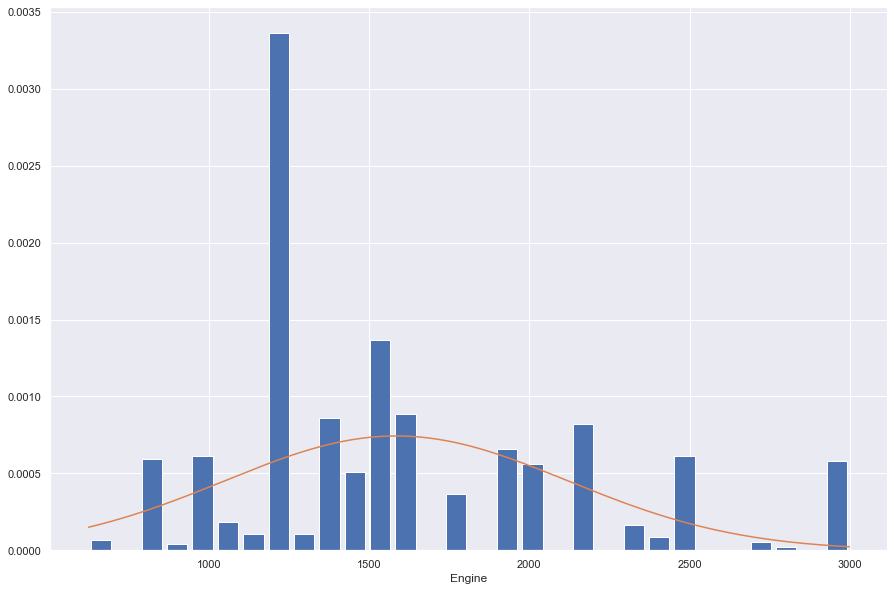

In [71]:
std = test_df.Engine.std()
mean = test_df.Engine.mean()
upperlimit = mean+(3*std)
lowerlimit = mean-(3*std)
test_df = test_df[(test_df.Engine>lowerlimit) & (test_df.Engine<upperlimit)]

plt.hist(test_df.Engine, bins=30, rwidth=0.8, density=True)
plt.xlabel('Engine')
rang = np.arange(test_df.Engine.min(),test_df.Engine.max(),0.1)
plt.plot(rang, norm.pdf(rang, test_df.Engine.mean(), test_df.Engine.std()))
plt.show()

### Feature transformation

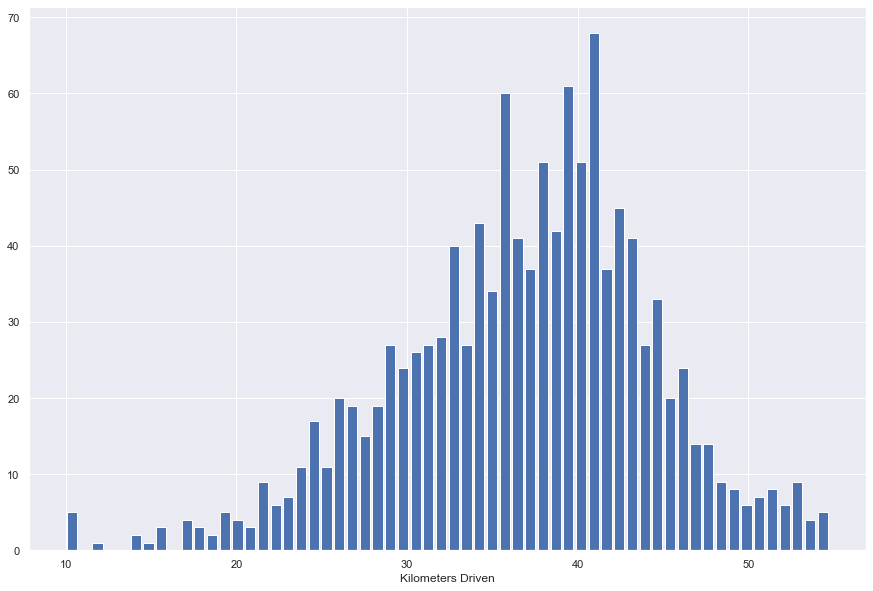

In [72]:
x = np.cbrt(test_df.Kilometers_Driven)
plt.hist(x,bins=60,rwidth=.8)
plt.xlabel('Kilometers Driven')
plt.show()

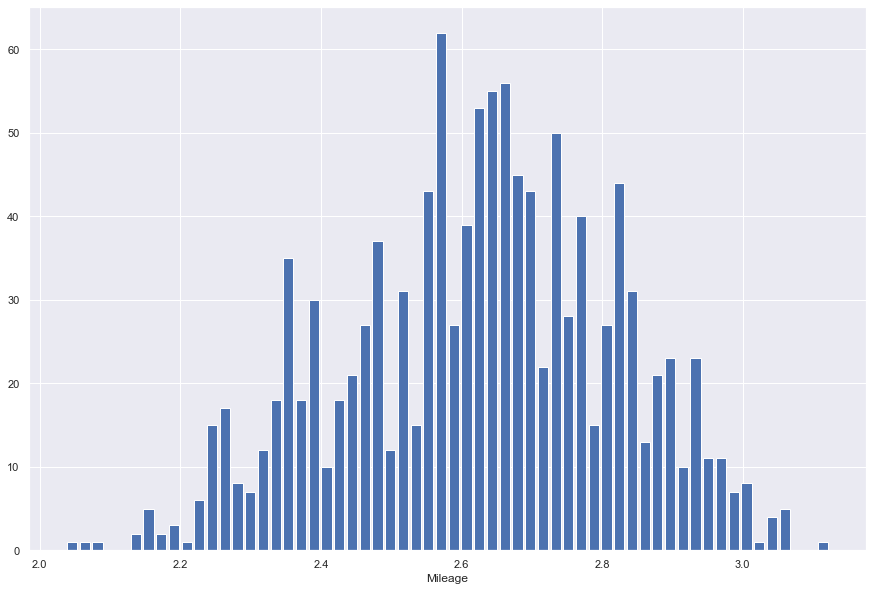

In [73]:
x = np.cbrt(test_df.Mileage)
plt.hist(x,bins=60,rwidth=.8)
plt.xlabel('Mileage')
plt.show()

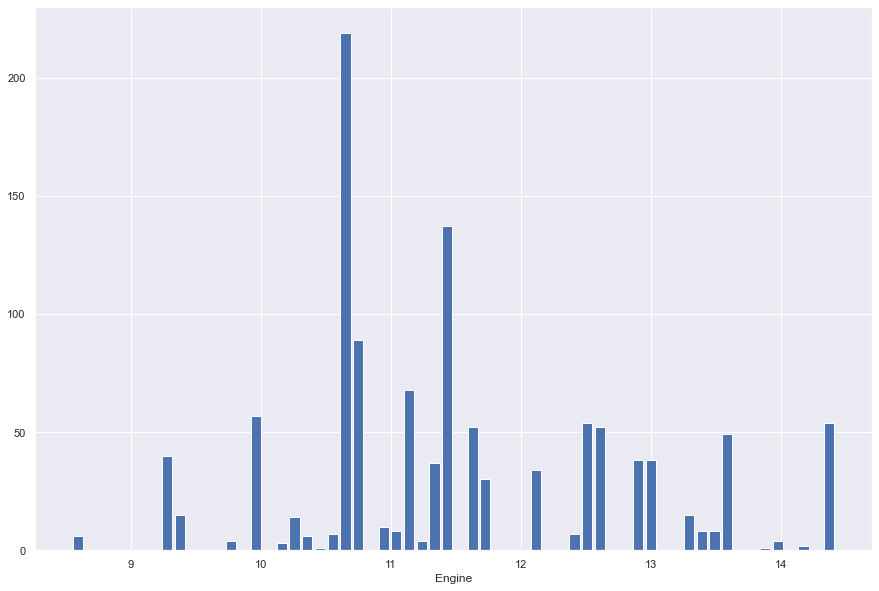

In [74]:
x = np.cbrt(test_df.Engine)
plt.hist(x,bins=60,rwidth=.8)
plt.xlabel('Engine')
plt.show()

### Feature Scaling and Standardization

### Using MinMaxScaler

In [75]:
scaler = MinMaxScaler(feature_range=(0, 1))
numeric = scaler.fit_transform(test_df)
test_df1 = pd.DataFrame(data=numeric, columns=['Kilometers_Driven','Mileage','Engine'])
test_df1.head()

Kilometers_Driven   Mileage    Engine
0           0.328178  0.738301  0.072421
1           0.202454  0.237619  0.744842
2           0.171779  0.456611  0.241263
3           0.519074  0.343026  0.654737
4           0.355828  0.186279  0.992842

### Using StandardScaler

In [76]:
scaler = StandardScaler()
numeric = scaler.fit_transform(test_df)
test_df2 = pd.DataFrame(data=numeric, columns=['Kilometers_Driven','Mileage','Engine'])
test_df2.head()

Kilometers_Driven   Mileage    Engine
0          -0.048157  1.589840 -1.469727
1          -0.715380 -1.184398  1.506950
2          -0.878173  0.029016 -0.722296
3           0.964935 -0.600348  1.108071
4           0.098584 -1.468871  2.604798

### Using RobustScaler

In [77]:
scaler = RobustScaler()
numeric = scaler.fit_transform(test_df)
test_df3 = pd.DataFrame(data=numeric, columns=['Kilometers_Driven','Mileage','Engine'])
test_df3.head()

Kilometers_Driven   Mileage    Engine
0           0.027356  1.087719 -0.863636
1          -0.493161 -0.845614  1.210390
2          -0.620160  0.000000 -0.342857
3           0.817693 -0.438596  0.932468
4           0.141832 -1.043860  1.975325

# 5. Training Model

In [78]:
#using MinMaxScaler data
model1 = LinearRegression()
#using StandardScaler data
model2 = LinearRegression()
#using RobustScaler data
model3 = LinearRegression()

### Model Using MinMaxScaler dataset

In [79]:
## Train-Test split
X, y = train_df1.iloc[:,:-1],train_df1.Price

#use sklearn train_test_split() method to split your data into training and testing set
X1_train,X1_test,y1_train,y1_test = train_test_split(X,y,test_size = 0.20)

In [80]:
model1.fit(X1_train,y1_train)
model1

LinearRegression()

In [81]:
model1.coef_

array([-0.53885815,  0.1540318 ,  0.73456519])

In [82]:
model1.intercept_

-0.04986748943324809

### Model Using StandardScaler dataset

In [83]:
## Train-Test split
X, y = train_df2.iloc[:,:-1],train_df2.Price

#use sklearn train_test_split() method to split your data into training and testing set
X2_train,X2_test,y2_train,y2_test = train_test_split(X,y,test_size = 0.20)

In [84]:
model2.fit(X2_train,y2_train)
model2

LinearRegression()

In [85]:
model2.coef_

array([-0.32956063,  0.15109712,  0.81057401])

In [86]:
model2.intercept_

0.0015617329729773807

### Model Using RobustScaler dataset

In [87]:
## Train-Test split
X, y = train_df3.iloc[:,:-1],train_df3.Price

#use sklearn train_test_split() method to split your data into training and testing set
X3_train,X3_test,y3_train,y3_test = train_test_split(X,y,test_size = 0.20)

In [88]:
model3.fit(X3_train,y3_train)
model3

LinearRegression()

In [89]:
model3.coef_

array([-0.49290514,  0.25844269,  1.53002032])

In [90]:
model3.intercept_

0.2807235863523133

# 6. Prediction

### Model one 

In [91]:
model1.predict(X1_test)

array([0.18245662, 0.49779591, 0.1426705 , ..., 0.27654554, 0.26435419,
       0.2755055 ])

In [92]:
#checking the model by mapping the output value with the dataset value
x = np.array([0.239567,0.826595,0.145186]).reshape(-1,3)
model1.predict(x) #actual outpout => 0.032298

array([0.05501038])

### Model two 

In [93]:
model2.predict(X2_test)

array([ 0.28674125,  0.89623092,  0.50199162, ..., -1.05565247,
        0.89094784, -0.23228361])

In [94]:
#checking the model by mapping the output value with the dataset value
x = np.array([0.436653,1.991182,-1.096283]).reshape(-1,3)
model2.predict(x) #actual output => -0.849498

array([-0.73009856])

### Model three 

In [95]:
model3.predict(X3_test)

array([-0.27197358,  0.66014978,  0.99992126, ..., -0.56488807,
        0.31110147,  3.2310395 ])

In [96]:
#checking the model by mapping the output value with the dataset value
x = np.array([0.478080,1.464738,-0.600519]).reshape(-1,3)
model3.predict(x) #actual output => -0.652174

array([-0.49517994])

# 7. Evaluating your Model

### Model one

In [97]:
#accuracy score for training set
model1.score(X1_train,y1_train)

0.5122824181248014

In [98]:
#accuracy score for test set
model1.score(X1_test,y1_test)

0.4755979800529283

### Model two

In [99]:
#accuracy score for training set
model2.score(X2_train,y2_train)

0.50527136547737

In [100]:
#accuracy score for test set
model2.score(X2_test,y2_test)

0.5028343530555477

### Model three

In [101]:
#accuracy score for training set
model3.score(X3_train,y3_train)

0.5000948182875992

In [102]:
#accuracy score for test set
model3.score(X3_test,y3_test)

0.5229960621891596

# SUBMISSION DATE: 2nd April 2022